# Time Series Analysis of Walmart Sales Data

**Introduction**
In this project, we will analyze historical sales data from Walmart stores and develop a forecasting model to predict future sales. Using time series analysis techniques, we aim to uncover trends, seasonality, and anomalies in the data.

**Objectives**
- Perform an exploratory analysis of historical sales data.
- Identify patterns such as trends and seasonality.
- Build a forecasting model using ARIMA to predict future sales.

**Dataset**
- **Name**: Walmart Retail Sales
- **Source**: Kaggle
- **Description**: The dataset contains weekly sales data from Walmart stores, including additional information such as holiday dates. Each row represents the sales for a particular week.

---

**Expected Outcomes**
- **Exploratory Data Analysis**: Insights into historical sales patterns.
- **Forecasting**: A predictive model to estimate future sales.

## Data Import and Preparation
In this section, we load the Walmart sales dataset and prepare it for analysis. The steps include:
- Importing the data
- Exploring its structure and basic statistics
- Formatting the date column and setting it as the index
- Aggregating sales data to a weekly level

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [3]:
# Importing data from a CSV file into a pandas DataFrame.
df = pd.read_csv(r"Walmart.csv")

In [4]:
# Display structure of the Data
print("Datset Overview")
df.info()

Datset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set datecolumn as index
df.set_index('Date', inplace=True)

In [6]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in each column:")
missing_values

Missing Values in each column:


Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# Summarize Sales on weekly basis
weekly_sales = df['Weekly_Sales'].resample('W').sum()

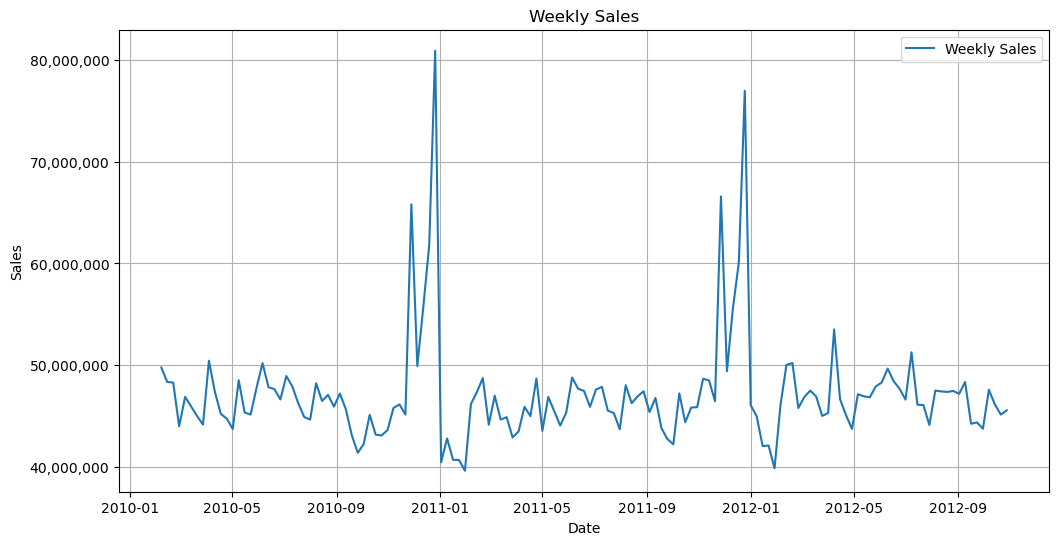

In [8]:
# Plot aggregated weekly sales:

plt.figure(figsize=(12,6))
plt.plot(weekly_sales, label='Weekly Sales')

# Format y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f'{int(x):,}'))


plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

## Exploratory Data Analysis (EDA)
In this step, we perform an exploratory analysis of the time series data to identify key patterns such as:
- Trends: Long-term increase or decrease in sales over time.
- Seasonality: Repeating patterns at regular intervals (e.g., yearly, monthly).
- Anomalies: Sudden spikes or drops in sales.

Additionally, we test the stationarity of the time series, which is a crucial prerequisite for time series modeling with ARIMA.

In [9]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

<Figure size 1500x600 with 0 Axes>

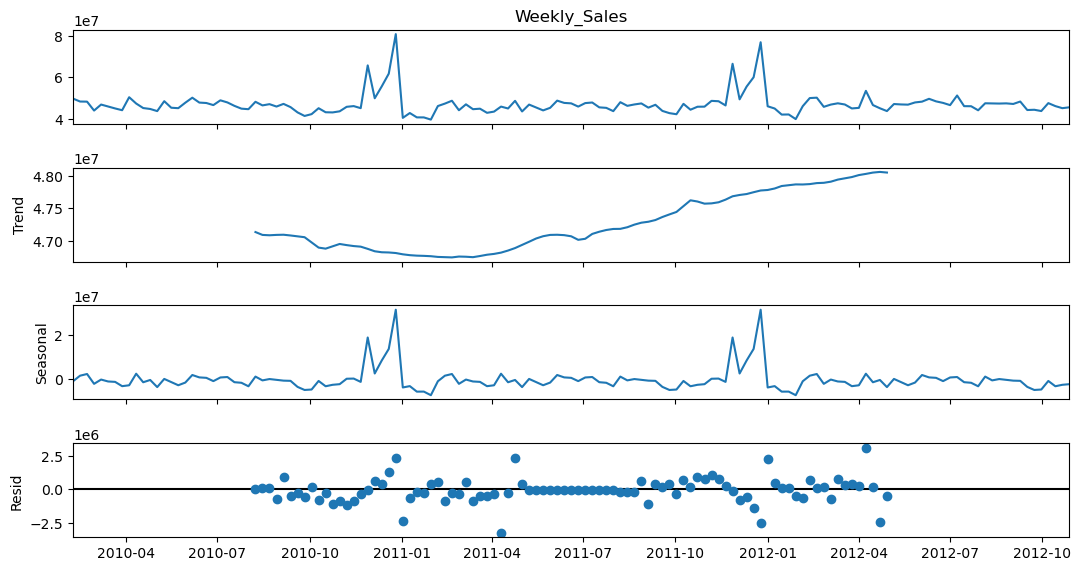

In [10]:
# Plot time series decomposition
plt.figure(figsize=(15,6))

decomposition = sm.tsa.seasonal_decompose(weekly_sales,
                                         model='additive',
                                         period=52)
fig = decomposition.plot()
fig.set_size_inches(12, 6)
plt.show()

In [11]:
# Augmented Dickey-Fuller Test for stationary
adf_test = adfuller(weekly_sales.dropna())
print('Augmented Dickey-Fuller Test:')
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print(f'Critical Values: {adf_test[4]}')

if adf_test[1] <= 0.05:
    print('Time Serie is stationary')
else:
    print('Time Series is non stationary')

Augmented Dickey-Fuller Test:
ADF Statistic: -5.908297957186335
p-value: 2.675979158986003e-07
Critical Values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}
Time Serie is stationary


## Modeling with ARIMA
Since the time series is stationary, we will proceed with fitting an ARIMA model. The ARIMA model (Auto-Regressive Integrated Moving Average) is a popular method for time series forecasting, especially for stationary data.
Steps:
1. Define the ARIMA model with appropriate parameters.
2. Train the model on the historical data.
3. Evaluate the model performance.

In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
# Define the ARIMA Model
model = ARIMA(weekly_sales, order=(5,1,0)) #(p=5, d=1, q=0)

model_fit = model.fit()

In [14]:
# Model summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2402.605
Date:                Tue, 20 May 2025   AIC                           4817.211
Time:                        07:12:14   BIC                           4834.946
Sample:                    02-07-2010   HQIC                          4824.417
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3061      0.042     -7.365      0.000      -0.388      -0.225
ar.L2         -0.2088      0.047     -4.413      0.000      -0.302      -0.116
ar.L3         -0.1829      0.058     -3.157      0.002      -0.296      -0.069
ar.L4          0.0932      0.060      1.562      0.118      -0.024       0.210
ar.L5         -0.1483      0.059     -2.530      0.011      -0.263      -0.033
sigma2       2.69e+13   3.82e-16   7.04e+28      0.000    2.69e+13    2.69e+13
===================================================================================
Ljung-Box (L1) (Q):                   3.04   Jarque-Bera (JB):               382.90
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.27
Prob(H) (two-sided):                  0.02   Kurtosis:                        11.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.01e+45. Standard errors may be unstable.
"""

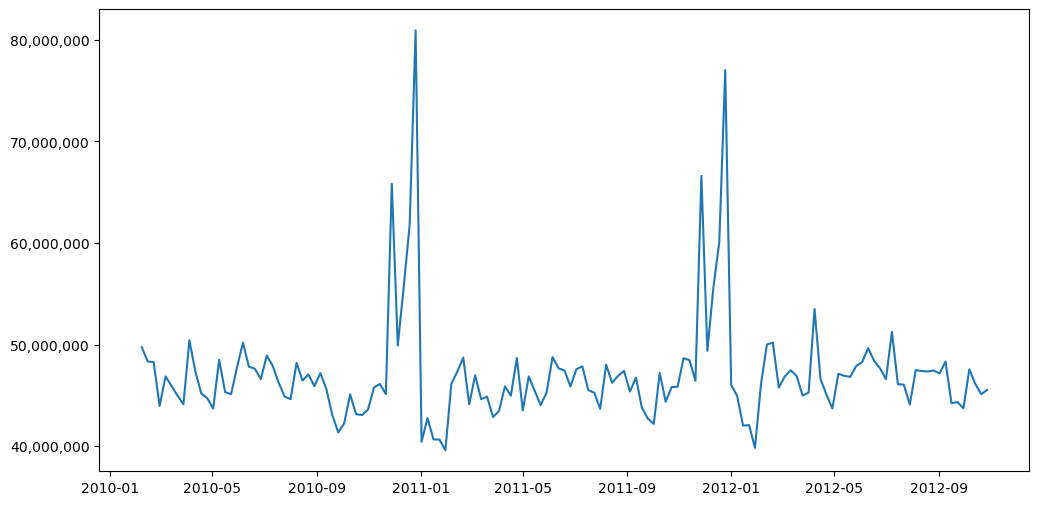

In [15]:
# Plot aggregated weekly sales:

plt.figure(figsize=(12,6))
plt.plot(weekly_sales, label='Weekly Sales')

# Format y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f'{int(x):,}'))

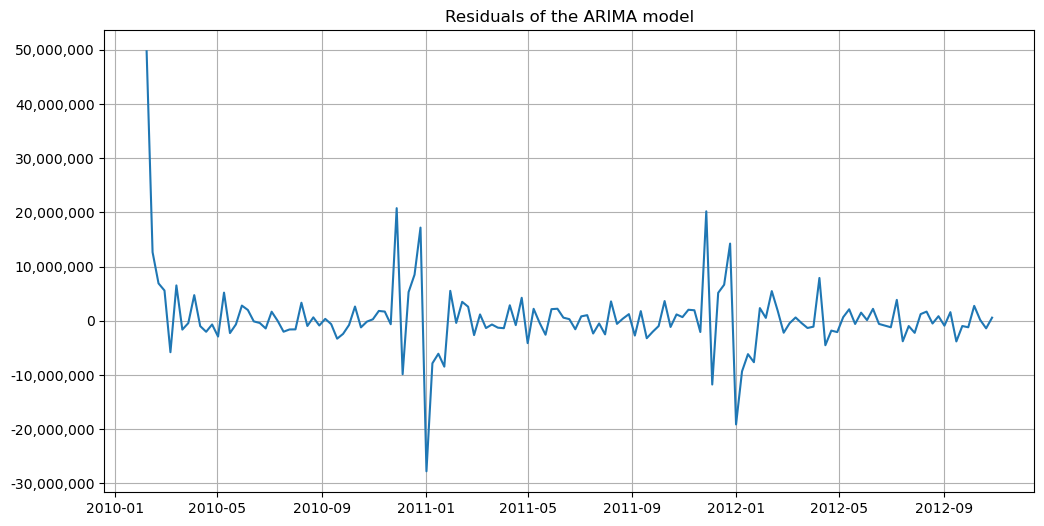

In [16]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(12,6))

# Format y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f'{int(x):,}'))

plt.plot(residuals)
plt.title('Residuals of the ARIMA model')
plt.grid()
plt.show()

### Revisiting Parameter Selection: ACF and PACF
During the ARIMA model fitting step, we encountered a warning regarding the covariance matrix being singular or near singular. This suggests that the chosen parameters `(p, d, q)` may not be optimal for the data.

To address this, we will revisit the parameter selection process using:
- **Autocorrelation Function (ACF):** Helps determine the `q` (Moving Average) parameter.
- **Partial Autocorrelation Function (PACF):** Helps determine the `p` (Auto-Regressive) parameter.

By visualizing the ACF and PACF plots, we can make a more informed choice of parameters to improve the model's performance and avoid numerical instability.

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

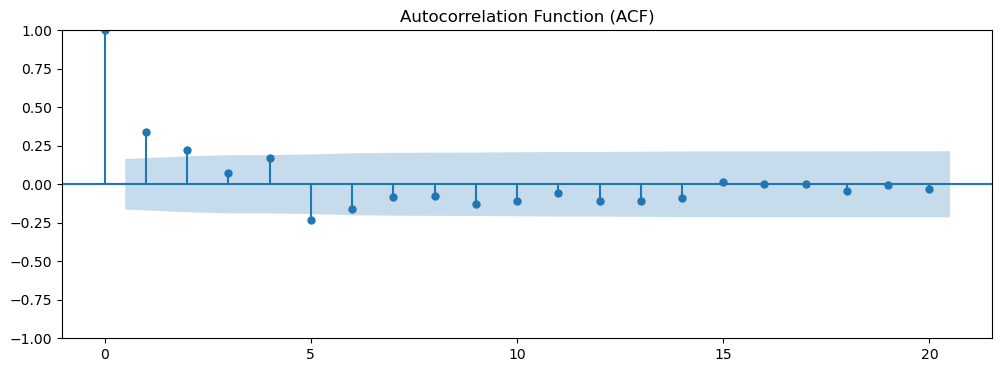

In [18]:
# Plot the ACF
fig_acf = plot_acf(weekly_sales, lags=20, title='Autocorrelation Function (ACF)')
fig_acf.set_size_inches(12,4)
plt.show()

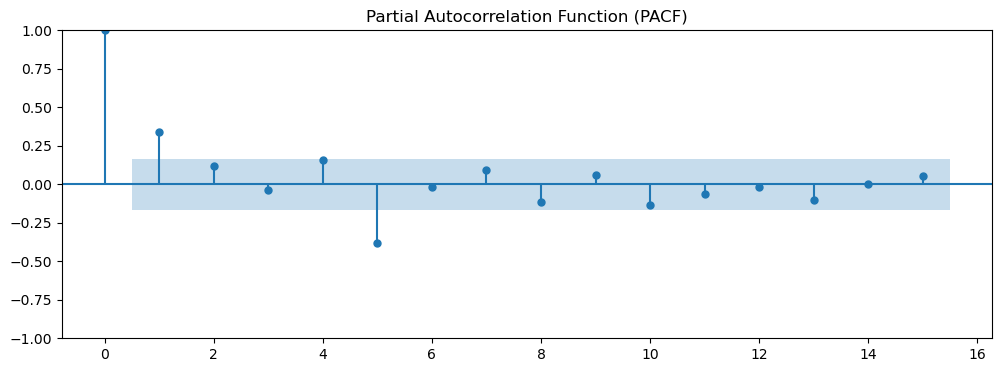

In [19]:
# Plot the PACF
fig_pacf = plot_pacf(weekly_sales, lags=15, title='Partial Autocorrelation Function (PACF)')
fig_pacf.set_size_inches(12,4)
plt.show()

### New Model Selection Based on ACF and PACF Plots
To refine our time series model, we analyzed the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to determine suitable values for the ARIMA parameters:
- **`p` (Auto-Regressive Order):** The PACF plot shows significant correlation at Lag 1, indicating that a single lag (p=1) captures the autoregressive relationship in the data.
- **`q` (Moving Average Order):** The ACF plot shows significant autocorrelation at Lags 1 and 2, suggesting that a moving average model with order 2 (q=2) is appropriate.
- **`d` (Differencing):** Since the time series was found to be stationary (based on the Augmented Dickey-Fuller Test), no differencing is required (d=0).

**Chosen ARIMA Model:**
- Parameters: **`p=1, d=0, q=2`**
- We fitted this model to the data and evaluated its performance to check how well it captures the dynamics of Walmart's weekly sales.

In [20]:
# Define the ARIMA model
model = ARIMA(weekly_sales, order=(1, 0, 2))  # p=1, d=0, q=2
model_fit = model.fit()

In [21]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2404.506
Date:                Tue, 20 May 2025   AIC                           4819.013
Time:                        07:12:22   BIC                           4833.827
Sample:                    02-07-2010   HQIC                          4825.032
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.711e+07   1.48e-09   3.18e+16      0.000    4.71e+07    4.71e+07
ar.L1         -0.7324      0.078     -9.360      0.000      -0.886      -0.579
ma.L1          1.2123      0.078     15.633      0.0

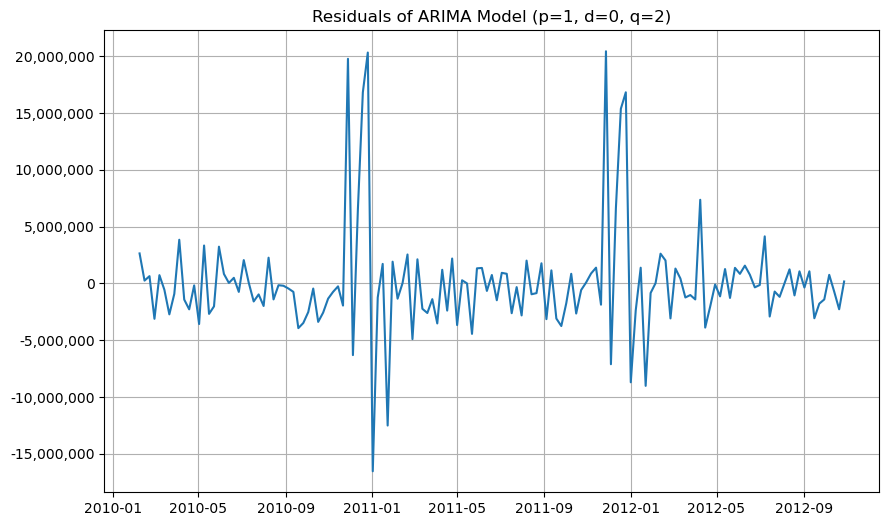

In [22]:
# Residual analysis
residuals = model_fit.resid
plt.figure(figsize=(10, 6))

# Format y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f'{int(x):,}'))

plt.plot(residuals)
plt.title('Residuals of ARIMA Model (p=1, d=0, q=2)')
plt.grid()
plt.show()

## Switch to SARIMA
The ARIMA(1, 0, 2) model provided useful insights but showed some limitations:
1. **Residual Analysis:**
   - The residual plot revealed patterns, indicating that the model does not fully capture the dynamics of the data.
   - Peaks in the residuals suggest that additional components, such as seasonality, might be influencing the sales data.

2. **Seasonal Nature of Weekly Sales:**
   - Walmart's weekly sales data likely exhibit seasonal patterns, such as increased sales during specific times of the year (e.g., holidays or promotional periods).
   - ARIMA cannot explicitly model seasonality, which might lead to suboptimal results.
  
**SARIMA** (Seasonal ARIMA) extends ARIMA by adding seasonal components:
- Seasonal terms account for periodic patterns in the data (e.g., annual seasonality for weekly data).
- A SARIMA model is defined as:
  - **(p, d, q)**: Non-seasonal parameters.
  - **(P, D, Q, m)**: Seasonal parameters, where:
    - `P`: Seasonal Auto-Regressive order.
    - `D`: Seasonal differencing order.
    - `Q`: Seasonal Moving Average order.
    - `m`: Seasonal period (e.g., `m=52` for weekly data with yearly seasonality).

**Objective:**
By introducing SARIMA, we aim to:
- Better capture seasonal effects in the sales data.
- Improve the overall model performance and reduce residual patterns.

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
# Define SARIMA model
sarima_model = SARIMAX(weekly_sales,
                       order=(1, 0, 2),           # Non-seasonal parameters
                       seasonal_order=(1, 1, 1, 13),  # Seasonal parameters (P, D, Q, m)
                       enforce_stationarity=False,
                       enforce_invertibility=False)


We use a quertly season as we have not enough data for a reliable weekly analysis

In [25]:
# Fit SARIMA model
sarima_fit = sarima_model.fit(disp=False)

In [26]:
# Summary of the SARIMA model
print(sarima_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                         Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 13)   Log Likelihood               -1952.301
Date:                              Tue, 20 May 2025   AIC                           3916.602
Time:                                      07:12:25   BIC                           3933.019
Sample:                                  02-07-2010   HQIC                          3923.265
                                       - 10-28-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7337      0.188     -3.905      0.000      -1.102      -0.365
ma.L1          1.17

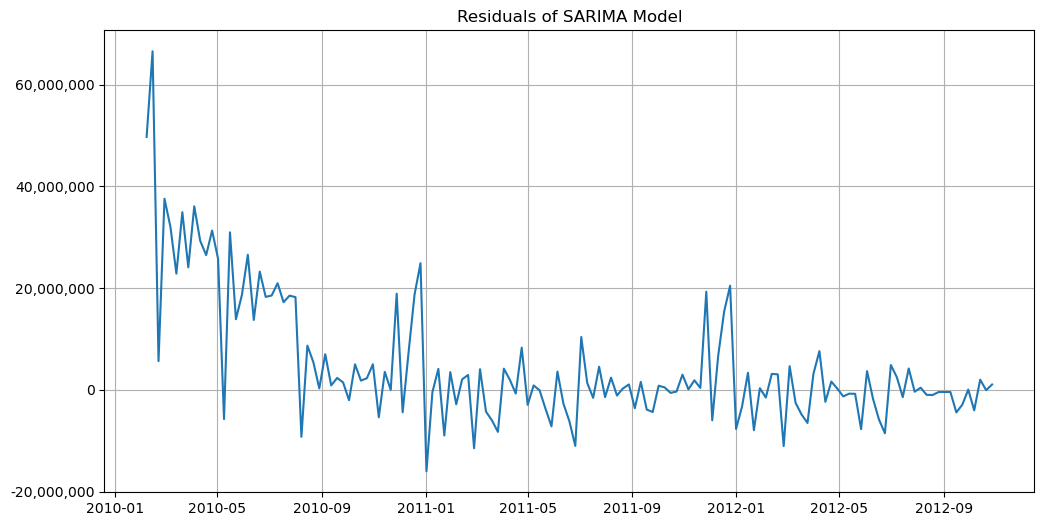

In [27]:
# Plot the residuals
residuals = sarima_fit.resid
plt.figure(figsize=(12, 6))

# Format y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f'{int(x):,}'))

plt.plot(residuals)
plt.title('Residuals of SARIMA Model')
plt.grid()
plt.show()


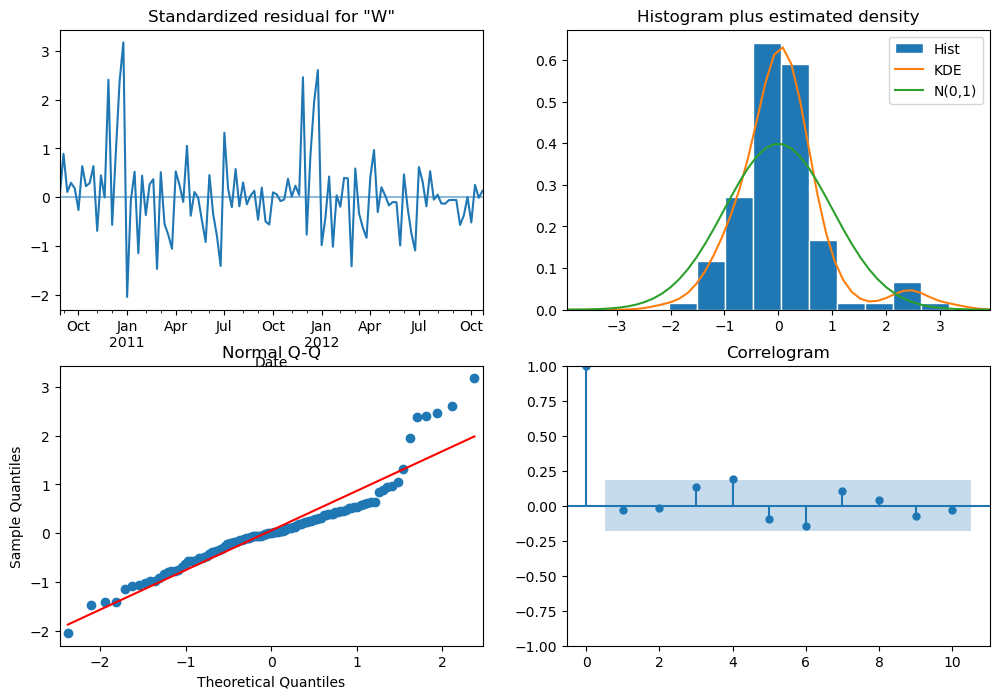

In [28]:
# Diagnostics plot for SARIMA
sarima_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

### SARIMA Model Analysis

**Current Model: SARIMA(1, 0, 2)x(1, 1, 1, 13)**
- **Key Features:**
  - Non-seasonal parameters: `(p=1, d=0, q=2)` chosen based on ACF/PACF analysis.
  - Seasonal parameters: `(P=1, D=1, Q=1, m=13)` to capture quarterly seasonality.


**Results:**
- **Residual Analysis:**
   - The residuals show no significant autocorrelation (Ljung-Box test p-value = 0.76).
   - However, the residual distribution deviates slightly from normality, as seen in the Q-Q plot and Jarque-Bera test.

- **Model Fit:**
   - AIC (3916.6) and BIC (3933.0) are lower compared to the ARIMA model, indicating an improved fit.
   - Seasonal components (`ar.S.L13`) are significant, confirming the presence of seasonal effects.


### Forecast with the SARIMA Model
To rigorously evaluate the SARIMA model's performance, we will split the data into:
- **Training Data:** Used to train the model.
- **Test Data:** The last 13 weeks of data, reserved for validation.

**Objectives:**
1. Predict sales for the last 13 weeks using the SARIMA model.
2. Compare the predictions against the actual sales in the test set.
3. Evaluate model performance using metrics such as:
   - Mean Absolute Error (MAE)
   - Mean Absolute Percentage Error (MAPE)
   - Root Mean Squared Error (RMSE)

This approach allows us to assess the model's forecasting accuracy and reliability.

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
# Define the split point (last 13 weeks for testing)
test_size = 13
train_data = weekly_sales[:-test_size]
test_data = weekly_sales[-test_size:]

In [31]:
# Train SARIMA model on training data
sarima_model = SARIMAX(train_data,
                       order=(1, 0, 2),
                       seasonal_order=(1, 1, 1, 13),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)

In [32]:
# Forecast for the test period
forecast = sarima_fit.get_forecast(steps=test_size)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [33]:
# Evaluate model performance
mae = mean_absolute_error(test_data, forecast_mean)
rmse = np.sqrt(mean_squared_error(test_data, forecast_mean))
mape = np.mean(np.abs((test_data - forecast_mean) / test_data)) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 1775404.05
Root Mean Squared Error (RMSE): 2414217.39
Mean Absolute Percentage Error (MAPE): 3.89%


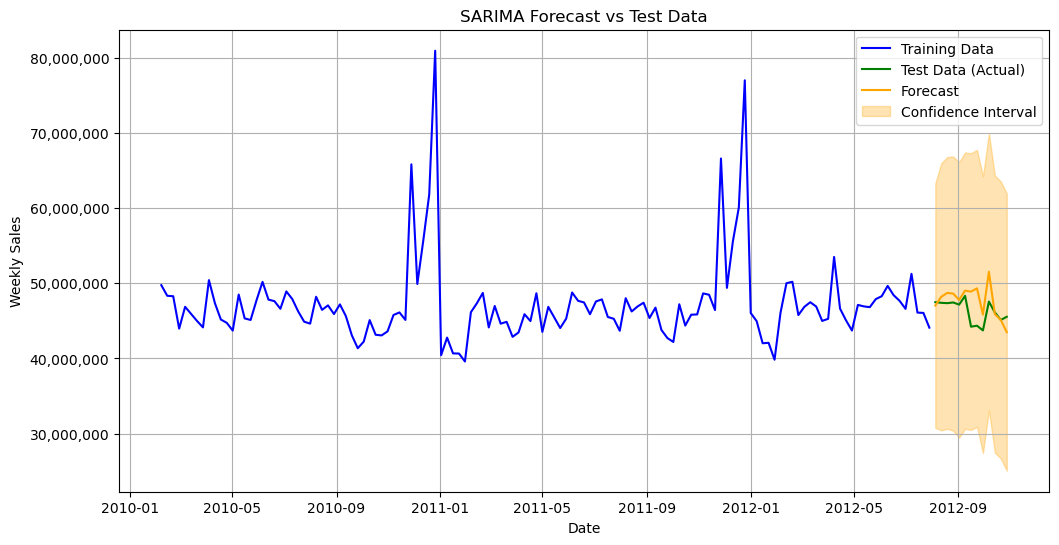

In [34]:
# Plot the forecast and test data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_data, label='Training Data', color='blue')

# Plot test data
plt.plot(test_data, label='Test Data (Actual)', color='green')

# Plot forecasted values
plt.plot(test_data.index, forecast_mean, label='Forecast', color='orange')

# Plot confidence intervals
plt.fill_between(test_data.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.3, label='Confidence Interval')

# Format y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f'{int(x):,}'))

plt.title('SARIMA Forecast vs Test Data')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()

### Evaluation Metrics
The performance of the SARIMA(1, 0, 2)x(1, 1, 1, 13) model was evaluated using standard forecasting metrics:
1. **Mean Absolute Error (MAE):** `1,775,404.05`
   - Indicates the average absolute difference between predicted and actual sales.
2. **Root Mean Squared Error (RMSE):** `2,414,217.39`
   - Penalizes larger errors more heavily than MAE.
3. **Mean Absolute Percentage Error (MAPE):** `3.89%`
   - Indicates that the model's predictions deviate from the actual sales by less than 4% on average.

**Insights from the Forecast Plot**
1. **Training Data Fit:**
   - The model fits the historical data well, with no apparent deviations.
2. **Test Data Predictions:**
   - The predicted sales align closely with the actual test data.
   - The **confidence intervals** are wide, reflecting uncertainty, but the actual values fall within these intervals, indicating robustness.
  
**Conclusion**
- The SARIMA model performed well in predicting weekly sales, with a low MAPE (3.89%).
- However, the wide confidence intervals suggest some uncertainty, which could be addressed by refining the model parameters further.

## Grid Search for Parameter Optimization

**Parameters to Optimize**
1. **Non-seasonal parameters (`p, d, q`)**:
   - `p`: Number of autoregressive (AR) terms.
   - `d`: Number of differencing (to ensure stationarity).
   - `q`: Number of moving average (MA) terms.

2. **Seasonal parameters (`P, D, Q, m`)**:
   - `P`: Seasonal autoregressive terms.
   - `D`: Seasonal differencing (to stabilize seasonal patterns).
   - `Q`: Seasonal moving average terms.
   - `m`: Seasonal period (13 weeks for quarterly seasonality).

**Approach**
1. Define a search space for the parameters.
2. Fit a SARIMA model for each combination of parameters.
3. Use metrics like **AIC (Akaike Information Criterion)** to compare model performance.
   - A lower AIC indicates a better fit.

In [35]:
import itertools

In [ ]:
# Define the parameter ranges
p = [0, 1, 2, 3]
d = [0]
q = [0, 1, 2, 3]
P = [0, 1, 2]
D = [1]
Q = [0, 1, 2]
m = 13

# Generate all combinations of parameters
parameter_combinations = list(itertools.product(p, d, q, P, D, Q))

In [ ]:
# Placeholder for results
results = []

# Iterate over all combinations of parameters
for param in parameter_combinations:
    try:
        model = SARIMAX(weekly_sales,
                        order=(param[0], param[1], param[2]),
                        seasonal_order=(param[3], param[4], param[5], m),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        model_fit = model.fit(disp=False)

        results.append((param, model_fit.aic))
    except Exception as e:
        continue

In [ ]:
# Find the best combination
best_params = sorted(results, key=lambda x: x[1])[0]

print(f"Best Parameters: {best_params[0]}")
print(f"Best AIC: {best_params[1]}")

**Best Parameter Combination:**
- Non-seasonal parameters: `(p=3, d=0, q=3)`
- Seasonal parameters: `(P=0, D=1, Q=2, m=13

**Key Observations:**
1. The model parameters suggest a more complex non-seasonal ARIMA component with both autoregressive (`p=3`) and moving average (`q=3`) terms.
2. Seasonal components indicate no seasonal autoregressive term (`P=0`), but the inclusion of seasonal moving average terms (`Q=2`) improves the fit.
3. The AIC reduction indicates that the optimized model better explains the variance in the data compared to the previous configuration.

**Next Steps:**
1. Fit the SARIMA model with these optimized parameters.
2. Evaluate the model's residuals and diagnostic plots.
3. Test the model's performance in forecasting.

In [ ]:
# Define the best parameters from the Grid Search
best_order = (3, 0, 3)
best_seasonal_order = (0, 1, 2, 13)

In [ ]:
# Initialize the SARIMA model with the best parameters
optimized_model = SARIMAX(weekly_sales,
                          order=best_order,
                          seasonal_order=best_seasonal_order,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

optimized_fit = optimized_model.fit(disp=False)

In [ ]:
# Fit the model using the Powell optimization method to avoid convergence error
optimized_fit = optimized_model.fit(disp=False, method='powell')

In [ ]:
# Print the summary of the optimized model
print(optimized_fit.summary())

In [ ]:
# Plot diagnostic graphs for residual analysis
optimized_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

### Forecast with the optimized SARIMA Model

**Objective**
To evaluate the performance of the optimized SARIMA(3, 0, 3)x(0, 1, [1, 2], 13) model, we use a train-test split approach:
- **Training Data:** Historical weekly sales data, excluding the last 13 weeks.
- **Test Data:** The last 13 weeks, reserved for validation.

**Approach**
1. Train the SARIMA model on the training data.
2. Forecast the weekly sales for the test period (13 weeks).

In [ ]:
# Define the split point (last 13 weeks for testing)
test_size = 13
train_data = weekly_sales[:-test_size]
test_data = weekly_sales[-test_size:]

In [ ]:
# Train the SARIMA model on the training data
optimized_model = SARIMAX(train_data,
                          order=(3, 0, 3),  # Optimized non-seasonal parameters
                          seasonal_order=(0, 1, 2, 13),  # Optimized seasonal parameters
                          enforce_stationarity=False,
                          enforce_invertibility=False)

# Fit the model using the Powell method to avoid convergence warnings
optimized_fit = optimized_model.fit(method='powell', disp=False)

In [ ]:
# Generate forecast for the test period
forecast = optimized_fit.get_forecast(steps=test_size)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [ ]:
# Evaluate model performance
mae = mean_absolute_error(test_data, forecast_mean)
rmse = np.sqrt(mean_squared_error(test_data, forecast_mean))
mape = np.mean(np.abs((test_data - forecast_mean) / test_data)) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

In [ ]:
# Plot the forecast against the test data
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train_data, label='Training Data', color='blue')

# Plot test data
plt.plot(test_data, label='Test Data (Actual)', color='green')

# Plot forecasted values
plt.plot(test_data.index, forecast_mean, label='Forecast', color='orange')

# Plot confidence intervals
plt.fill_between(test_data.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.3, label='Confidence Interval')

# Format y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, _: f'{int(x):,}'))

plt.title('Optimized SARIMA Model: Forecast vs Test Data')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()

### Reflection on the Optimized SARIMA Model

**Key Results**
1. **Performance Metrics:**
   - **Mean Absolute Percentage Error (MAPE):** 6.51%
   - **Mean Absolute Error (MAE):** 2,970,006.57
   - **Root Mean Squared Error (RMSE):** 4,234,200.67
   - While the model provides a reasonable forecast, the performance metrics indicate a decline compared to the simpler SARIMA(1, 0, 2)x(1, 1, 1, 13) model, which achieved a MAPE of 3.89%.

2. **Model Complexity:**
   - The optimized SARIMA(3, 0, 3)x(0, 1, [1, 2], 13) model is more complex, which may have led to overfitting. The broader confidence intervals further indicate challenges in reducing uncertainty.

3. **Impact of Optimization Method:**
   - The use of the **Powell optimization method** helped resolve convergence issues, but it may have influenced the parameter estimates, leading to less robust results.

---

**Key Takeaways**
1. The **simpler SARIMA(1, 0, 2)x(1, 1, 1, 13)** model outperforms the optimized model in terms of accuracy and interpretability.
2. Increased complexity does not always lead to better performance, especially in time series models where overfitting can be an issue.
3. The Powell method resolved numerical issues but may have affected parameter estimation, suggesting that returning to a simpler model might improve stability and performance.

---

**Next Steps**
1. **Return to the Original Model:**
   - Reassess the performance of the SARIMA(1, 0, 2)x(1, 1, 1, 13) model, as it showed better overall performance and interpretability.
     
2. **Investigate Alternative Methods:**
   - Consider applying transformations (e.g., log-transformation) to stabilize variance.
   - Experiment with other forecasting methods (e.g., Prophet or LSTM models) for comparison.

## Future Work
This notebook represents the first iteration of a time series forecasting project using SARIMA models. While the results are promising, there are several avenues for further exploration:
- Experimenting with alternative models such as Prophet or machine learning approaches like XGBoost or LSTMs.
- Incorporating additional features, such as holiday data or promotional information, to improve model performance.
- Refining the SARIMA model further to reduce uncertainty and improve forecast accuracy.

**Feedback Welcome!**
If you have suggestions for improving the analysis or additional techniques to explore, feel free t